<div style="text-align: center; background-color: skyblue; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 15px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    INTRODUCTION TO DATA SCIENCE<br>
    @ FIT-HCMUS, VNU-HCM<br>
    FINAL PROJECT 🏫
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    THE ANALYSIS OF THE MOBILE PHONE MARKET AT MOBILE CITY STORE
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>


---

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA EXPLORATION
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

**Người thực hiện**: Đoàn Minh Cường

**MSSV**: 22120043


---

Câu 1: Hãng điện thoại có ảnh hưởng đến giá cả không ?

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
# đọc dữ liệu và tiền xử lý
data = pd.read_csv('data.csv', sep =',')
def clean_price(price):
    price = str(price).replace('.', '').replace('đ', '').replace('₫', '').strip()  # Loại bỏ dấu chấm và chữ "đ"
    try:
        return float(price)
    except ValueError:
        return np.nan

data['Giá cũ'] = data['Giá cũ'].apply(clean_price)
data['Giá mới'] = data['Giá mới'].apply(clean_price)


data.dtypes


Tên sản phẩm                    object
Giá mới                        float64
Giá cũ                         float64
Màu sắc                         object
Các phiên bản bộ nhớ            object
Thời gian bảo hành              object
Thông số kỹ thuật               object
Đánh giá                        object
Số lượt đánh giá và hỏi đáp      int64
Đường dẫn                       object
dtype: object

In [131]:
#tach du lieu 
branch = data.loc[:,'Tên sản phẩm'].str.split(' ').str[2]
prices = data['Giá mới']
data = pd.DataFrame({'Hang':branch, 'Gia':prices})
data.loc[:, 'Hang']

0           LG
1       Xiaomi
2       Xiaomi
3       Xiaomi
4       Xiaomi
         ...  
1415    Vsmart
1416    Huawei
1417    iPhone
1418    Bphone
1419    iPhone
Name: Hang, Length: 1420, dtype: object

In [ ]:
# gom nhom du lieu
new_data = data.groupby('Hang').agg({
    'Gia': ['mean', 'count']
}).reset_index()
new_data.columns = ['Hang', 'Gia trung binh', 'So luong']
# Lấy những hãng điện thoại có số lượng những điện thoại có số lượng trên 20 để chính xác
mask = new_data.loc[:,'So luong'] > 20
new_data = new_data[mask]
new_data

,Hang,Gia trung binh,So luong
3,Asus,1.451318e+07,22
33,Nubia,1.198615e+07,26
34,OPPO,1.067125e+07,56
35,OnePlus,1.089718e+07,39
40,Realme,5.462024e+06,126
43,Samsung,8.714848e+06,99
49,Tecno,4.477143e+06,28
54,Vivo,9.255044e+06,136
56,Xiaomi,6.879931e+06,289
58,iPhone,1.588096e+07,46


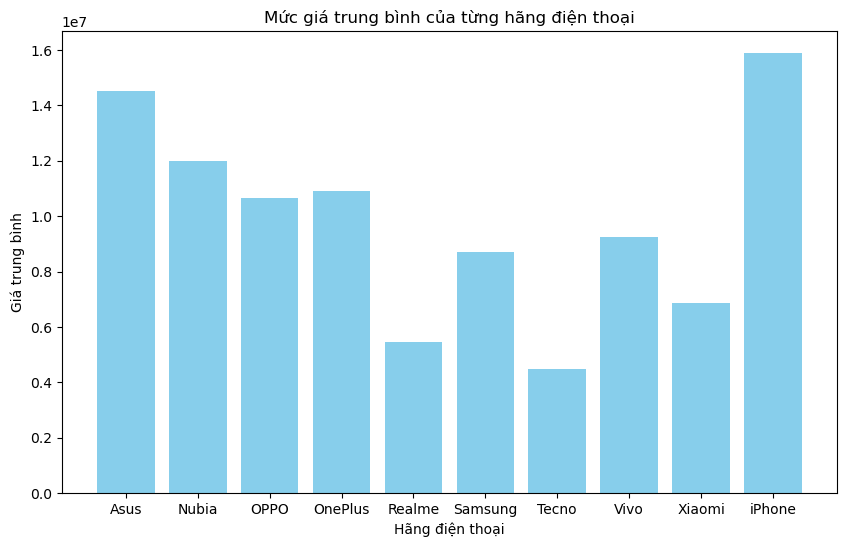

In [159]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(new_data['Hang'], new_data['Gia trung binh'], color='skyblue')
plt.xlabel('Hãng điện thoại')
plt.ylabel('Giá trung bình')
plt.title('Mức giá trung bình của từng hãng điện thoại')
plt.show()

Kết Luận: 
    - Từ biểu đồ trên cho thấy hãng điện thoại có liên qua nhiều đến giá 
    - Hãng lớn, nổi tiếng và sang trọng như iPhone, Asus thì sẽ có giá rất cao. 
    - Những hãng lớn nhưng hướng nhưng bình dân hơn (như Samsung, Vivo,....) sẽ có giá ở tầm trung để mọi người dễ tiếp cận hơn.
    - Còn với những hãng kiếm nổi tiếng như Realme, tecno thì giá cả thấp, người dùng có thể thử